In [1]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
# Define the orthogonal vectors
def random_orthogonal_unit_vectors(dim):
    v1 = np.random.rand(dim)
    v1 = v1/np.linalg.norm(v1)
    v2 = np.random.rand(dim)
    v3 = v2 - (v2.dot(v1) * v1)
    v3 = v3/np.linalg.norm(v3)
    return v1, v3

def get_plane(v1,v2,dim,steps=10):
    plane1 = np.linspace(np.zeros(dim),v1,steps)
    plane2 = np.linspace(np.zeros(dim),v2,steps)
    plane = []
    for p1 in plane1:
        for p2 in plane2:
            plane.append(p1+p2)
    return np.array(plane)

## 3 random planes

In [4]:
# 1 random plane
dim = 3
mag = 1
mid = [0.5 for _ in range(dim)]

# get plane given random orthogonal unit vectors
plane_steps = 20
v1, v2 = random_orthogonal_unit_vectors(dim)
third = np.cross(v1, v2)
plane = get_plane(v1,v2,dim,plane_steps)

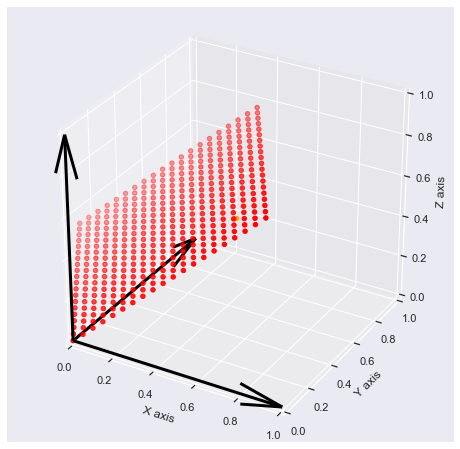

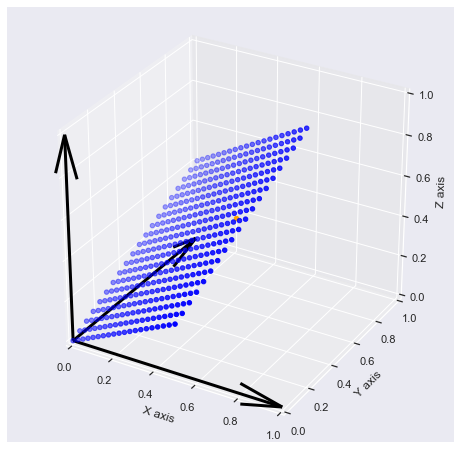

In [12]:
# 3D representation of the orthogonal vectors
colors = ['red','blue']
for c in colors:

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(mid[0],mid[1],mid[2],color='orange') # plot middle oi
    ax.quiver(0,0,0,0,0,1, color = 'black', lw=3, arrow_length_ratio=0.2) # z axis
    ax.quiver(0,0,0,0,1,0, color = 'black', lw=3, arrow_length_ratio=0.2) # y axis
    ax.quiver(0,0,0,1,0,0, color = 'black', lw=3, arrow_length_ratio=0.2) # x axis

    v1, v2 = random_orthogonal_unit_vectors(dim)
    plane = get_plane(v1,v2,dim,plane_steps)
    ax.scatter(plane[:,0],plane[:,1],plane[:,2],color=c)

    ax.set_xlim([0, 1]), ax.set_ylim([0, 1]), ax.set_zlim([0, 1])
    ax.set_xlabel('X axis'), ax.set_ylabel('Y axis'), ax.set_zlabel('Z axis')
    plt.show()
    

## Translate plane origin from (0,0,0) to (1/2,1/2,1/2)

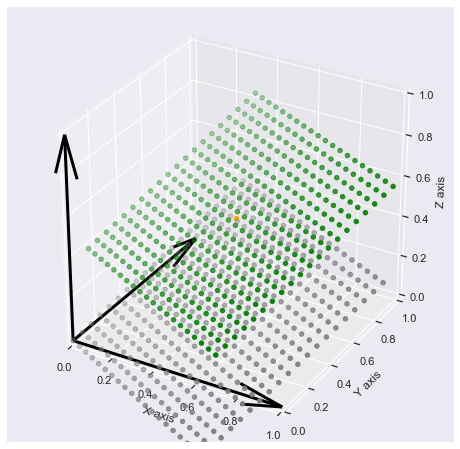

In [23]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mid[0],mid[1],mid[2],color='orange') # plot middle oi
ax.quiver(0,0,0,0,0,1, color = 'black', lw=3, arrow_length_ratio=0.2) # z axis
ax.quiver(0,0,0,0,1,0, color = 'black', lw=3, arrow_length_ratio=0.2) # y axis
ax.quiver(0,0,0,1,0,0, color = 'black', lw=3, arrow_length_ratio=0.2) # x axis

v1, v2 = random_orthogonal_unit_vectors(dim)
plane = get_plane(v1,v2,dim,plane_steps)
steps = 20
shifted_plane1 = np.linspace(mid - (0.5*v1),mid + (0.5*v1),steps)
shifted_plane2 = np.linspace(mid - (0.5*v2),mid + (0.5*v2),steps)
shifted_plane = []
for p1 in shifted_plane1:
    for p2 in shifted_plane2:
        shifted_plane.append(p1+(p2-mid))
shifted_plane = np.array(shifted_plane)

ax.scatter(shifted_plane[:,0],shifted_plane[:,1],shifted_plane[:,2],color='green')
ax.scatter(plane[:,0],plane[:,1],plane[:,2],color='grey')
    
ax.set_xlim([0, 1]), ax.set_ylim([0, 1]), ax.set_zlim([0, 1])
ax.set_xlabel('X axis'), ax.set_ylabel('Y axis'), ax.set_zlabel('Z axis')
plt.show()

In [ ]:
# plane1 = np.linspace(mid - (0.5*v3),mid + (0.5*v3),steps)
# plane2 = np.linspace(mid - (0.5*v4),mid + (0.5*v4),steps)
# plane3 = np.linspace(mid - (0.5*third),mid + (0.5*third),steps)

# plane = []
# for p1 in plane1:
#     for p2 in plane2:
#         plane.append(p1+(p2-mid))
# plane = np.array(plane)
# testplane = plane - (0.5*third)


# fig = plt.figure(figsize=(8, 8))
# ax = fig.add_subplot(111, projection='3d')

# ax.scatter(mid[0],mid[1],mid[2],color='blue') # plot middle oi
# ax.quiver(0,0,0,0,0,1, color = 'black', lw=3, arrow_length_ratio=0.2) # z axis
# ax.quiver(0,0,0,0,1,0, color = 'black', lw=3, arrow_length_ratio=0.2) # y axis
# ax.quiver(0,0,0,1,0,0, color = 'black', lw=3, arrow_length_ratio=0.2) # x axis


# ax.quiver(start1[0],start1[1],start1[2], v3[0], v3[1], v3[2], color = 'black', lw=3, arrow_length_ratio=0.2)
# ax.quiver(start2[0],start2[1],start2[2], v4[0], v4[1], v4[2], color = 'black', lw=3, arrow_length_ratio=0.2)
#     ax.quiver(start3[0],start3[1],start3[2], third[0], third[1], third[2], color = 'black', lw=3, arrow_length_ratio=0.2)

# ax.scatter(plane1[:,0],plane1[:,1],plane1[:,2],color='blue')
# ax.scatter(plane2[:,0],plane2[:,1],plane2[:,2],color='red')
# ax.scatter(plane[:,0],plane[:,1],plane[:,2],color='red')
# ax.scatter(testplane[:,0],testplane[:,1],testplane[:,2],color='blue')

# #     get corners
#     ax.scatter(plane[0][0],plane[0][1],plane[0][2],color='black')
#     ax.scatter(plane[steps-1][0],plane[steps-1][1],plane[steps-1][2],color='red')
#     ax.scatter(plane[(steps*steps)-steps][0],plane[(steps*steps)-steps][1],plane[(steps*steps)-steps][2],color='orange')
# #     ax.scatter(plane[-1][0],plane[-1][1],plane[-1][2],color='black')
# ax.set_xlim([-1, 1]), ax.set_ylim([-1, 1]), ax.set_zlim([-1, 1])
# ax.set_xlabel('X axis'), ax.set_ylabel('Y axis'), ax.set_zlabel('Z axis')
# plt.show()
    

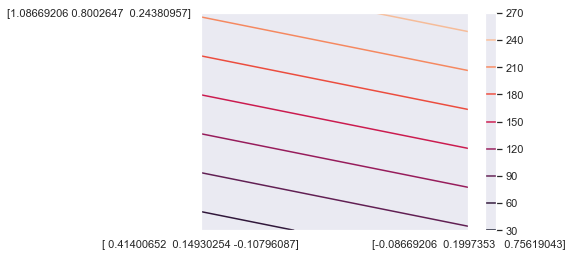

In [50]:
X = np.arange(len(plane1))
Y = np.arange(len(plane2))
Z = []
for i in X:
    Z.append([])
    for j in Y:
        idx = (steps*i)+j
        Z[-1].append(sum(plane[idx])*100)
        
plt.contour(X,Y,Z)
plt.colorbar()

idx = [0,steps-1]
idy = [steps*(steps-1)]

xvals = [X[0],X[-1]]
xtick = [plane[idx[0]],plane[idx[1]]]
yvals = [Y[-1]]
ytick = [plane[idy[0]]]

plt.xticks(xvals,xtick)
plt.yticks(yvals,ytick)
plt.yticks(rotation=0)
plt.show()

In [26]:
0.530+0.681-0.182

1.0290000000000001

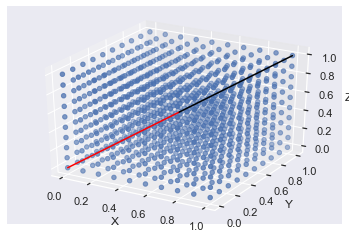

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a 3D paramter space
x_ = np.linspace(0, 1, 10)
y_ = np.linspace(0, 1, 10)
z_ = np.linspace(0, 1, 10)

X_new = np.column_stack((x_,y_,z_))

x, y, z = np.meshgrid(x_, y_, z_, indexing='ij')

assert np.all(x[:,0,0] == x_)
assert np.all(y[0,:,0] == y_)
assert np.all(z[0,0,:] == z_)

T = [np.linspace(0,0.5,10),np.linspace(0,0.5,10),np.linspace(0,0.5,10)]
ax.plot3D(T[0],T[1],T[2], 'red')
ax.scatter3D(x,y,z, 'blue')
T2 = []
for i in range(len(T)):
    T2.append(T[i]+0.5)
ax.plot3D(T2[0],T2[1],T2[2], 'black')


# data_2D = []
# for i in ax_data[0]:
#     for r in ax_data[1]:
#         curv = i+(r-pca.mean_)
#         data_2D.append(curv)
#         ax.scatter3D([curv[0]],[curv[1]],[curv[2]], 'green')


ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

In [4]:
def get_ranges(pca,inv_trans_X):
    ax_ranges = {i:None for i in range(len(pca.components_))}
    for i,vector in enumerate(pca.components_):
        # get max distance for scalar projection 
        projs = [(X-pca.mean_) for X in inv_trans_X]
        projs2 = [(np.dot(p,vector)/np.dot(vector,vector))*vector for p in projs]
        projs3 = [np.linalg.norm(projs2[i]-p) for i,p in enumerate(projs)]
        if not ax_ranges[i]:
            ax_ranges[i] = max(projs3)
        else:
            print("Vector twice?")
        
    ax_data = []
    steps = 10
    for i,vector in enumerate(pca.components_):  
        # vector projection (from mean to orthogonally beneat point in PCA line)
        ax_path = np.linspace(pca.mean_-(vector*ax_scalars[(i+1)%2]),pca.mean_+(vector*ax_scalars[(i+1)%2]),steps)
        ax_data.append(ax_path)
    return ax_data
    
# get 2D pca representation
def pca_data(data,d=2):
    pca = PCA(n_components=d)
    pca.fit(data)
    trans_X = pca.transform(data)
    inv_trans_X = pca.inverse_transform(trans_X)
    ax_ranges = get_ranges(pca,inv_trans_X)
    
    data_2D = []
    for i in ax_ranges[0]:
        for r in ax_ranges[1]:
            curv = i+(r-pca.mean_)
            data_2D.append(curv)
    return inv_trans_X,trans_X,pca.transform(data_2D)

def plot_pca2D(trans_X,inv_trans_X,data_2D):
    idx = [0,steps-1,steps*(steps-1)]
    colors = ['red','yellow','black']

    plt.plot(trans_X[:,0],trans_X[:,1])
    plt.scatter(data_2D[:,0],data_2D[:,1])
    
    for i,x in enumerate(colors):
        ix = idx[i]
        plt.scatter(data_2D[ix][0],data_2D[ix][1],color=colors[i])

In [5]:
inv_trans_X,trans_X,data_2D = pca_data(X)
plot_pca2D(trans_X,inv_trans_X,data_2D)
ticks_params = []

grid_nD = pca.inverse_transform(data_2D)
idx = [0,steps-1,steps*(steps-1)]
xvals = [min(data_2D[:,0]),max(data_2D[:,0])]
xtick = [grid_nD[idx[0]],grid_nD[idx[-1]]]
yval = [max(data_2D[:,1])]
ytick = [grid_nD[idx[1]]]

plt.xticks(xvals,xtick)
plt.yticks(yval,ytick)
plt.yticks(rotation=45,fontsize=5)
plt.show()

NameError: name 'X' is not defined